#### Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import model_utils
import warnings
from importlib import reload

In [45]:
plt.style.use('./styles.txt')
warnings.filterwarnings('ignore')

#### Index

1. [Introdcution](#intro)
2. [Data Loading](#dl)<br>
    2.1 [Preprocessing](#pp)<br>
3. [Modelling](#modelling)<br>
    3.1 [Baseline Model](#base)<br>
    3.2 [Upsampling with SMOTE](#smote)<br>
4. [Model Optimisation](#optimisation)<br>
    4.1 [Hyperparameter Optimisation](#param_opt)<br>
    4.2 [Hyperparameter Optimisation with Grid Search](#gridsearch)<br>
    4.2.1 [Saving the model](#save)<br>
    4.2.2 [Loading the model](#load)<br>
5. [Remarks on Decision Trees](#conc)<br>

---

<a id='intro'></a>

# Introduction

A decision tree classifier is a supervised learning algorithm that can be used for both classification and regression tasks. The algorithm works by constructing a tree of decision nodes, where each node represents a decision about which feature to split on, and each branch represents the possible outcomes of that decision. The tree is constructed by recursively applying the splitting criterion to the training data, starting at the root node and working down to the leaves. At each node, the algorithm selects the feature that maximizes the information gain, and splits the data accordingly. The leaves of the tree represent the predicted class labels for the data.

The decision tree classifier is a powerful tool for both classification and regression tasks, and can be used on a variety of data sets. The algorithm is easy to interpret and can be used to make predictions on new data.

---
<a id='dl'></a>
## Data Loading

In [20]:
df = utils.LoadDf()

In [21]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,avg_humidity,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
0,1992,1,0.10,A,43.325000,-101.018500,SD,5.257143,-2.928571,81.142857,...,0.000000,0.00,5.399184,3.5,47.062041,-1.8,1889.074286,-48.6,28.913469,-4.3
1,1992,1,1.00,B,33.058333,-79.979167,SC,13.700000,9.885714,81.428571,...,55.589796,-4.40,7.196327,0.1,5.575510,2.0,15648.559592,-14.9,19.071020,2.4
2,1992,2,0.25,A,40.775000,-74.854160,NJ,6.385714,1.585714,67.185714,...,9.546510,0.00,19.731020,4.0,34.516735,-10.6,16492.948163,-254.6,75.711429,-0.9
3,1992,3,1.91,B,31.018500,-83.297300,GA,14.457143,11.828571,78.957143,...,59.321224,-9.70,9.142041,-4.1,11.228571,0.2,16679.204898,223.6,21.585306,-8.4
4,1992,3,2.00,B,30.728900,-87.238100,FL,14.428571,10.985714,79.971429,...,0.213355,-1.32,10.262857,-7.9,27.382857,6.7,19587.093469,-24.8,13.107755,-2.7


<a id='pp'></a>
### Preprocessing

This will follow the same process as in previous models, however we will not have to convert the numeric columns as Decision Trees are insensitive to outliers in the data.

In [22]:
df = utils.BasicCategoricalPreprocessing(df)

In [23]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,avg_tempmax,avg_temp,avg_humidity,avg_precip,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1992,1,0.10,A,43.325000,-101.018500,5.257143,-2.928571,81.142857,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,1992,1,1.00,B,33.058333,-79.979167,13.700000,9.885714,81.428571,4.185714,...,0,0,0,0,0,0,0,0,0,0
2,1992,2,0.25,A,40.775000,-74.854160,6.385714,1.585714,67.185714,1.394286,...,0,0,0,0,0,0,0,0,0,0
3,1992,3,1.91,B,31.018500,-83.297300,14.457143,11.828571,78.957143,4.685714,...,0,0,0,0,0,0,0,0,0,0
4,1992,3,2.00,B,30.728900,-87.238100,14.428571,10.985714,79.971429,0.188571,...,0,0,0,0,0,0,0,0,0,0


---
<a id='modelling'></a>
## Modelling

<a id='base'></a>
### Baseline Model

In [24]:
from sklearn.model_selection import train_test_split

X, y = model_utils.GenerateXy(df)

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

base_DT_model = DecisionTreeClassifier(random_state=1)
base_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
print(f"The TRAIN classification accuracy is:  {base_DT_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {base_DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.9997477613822676
The TEST classification accuracy is:  0.3435345552379351


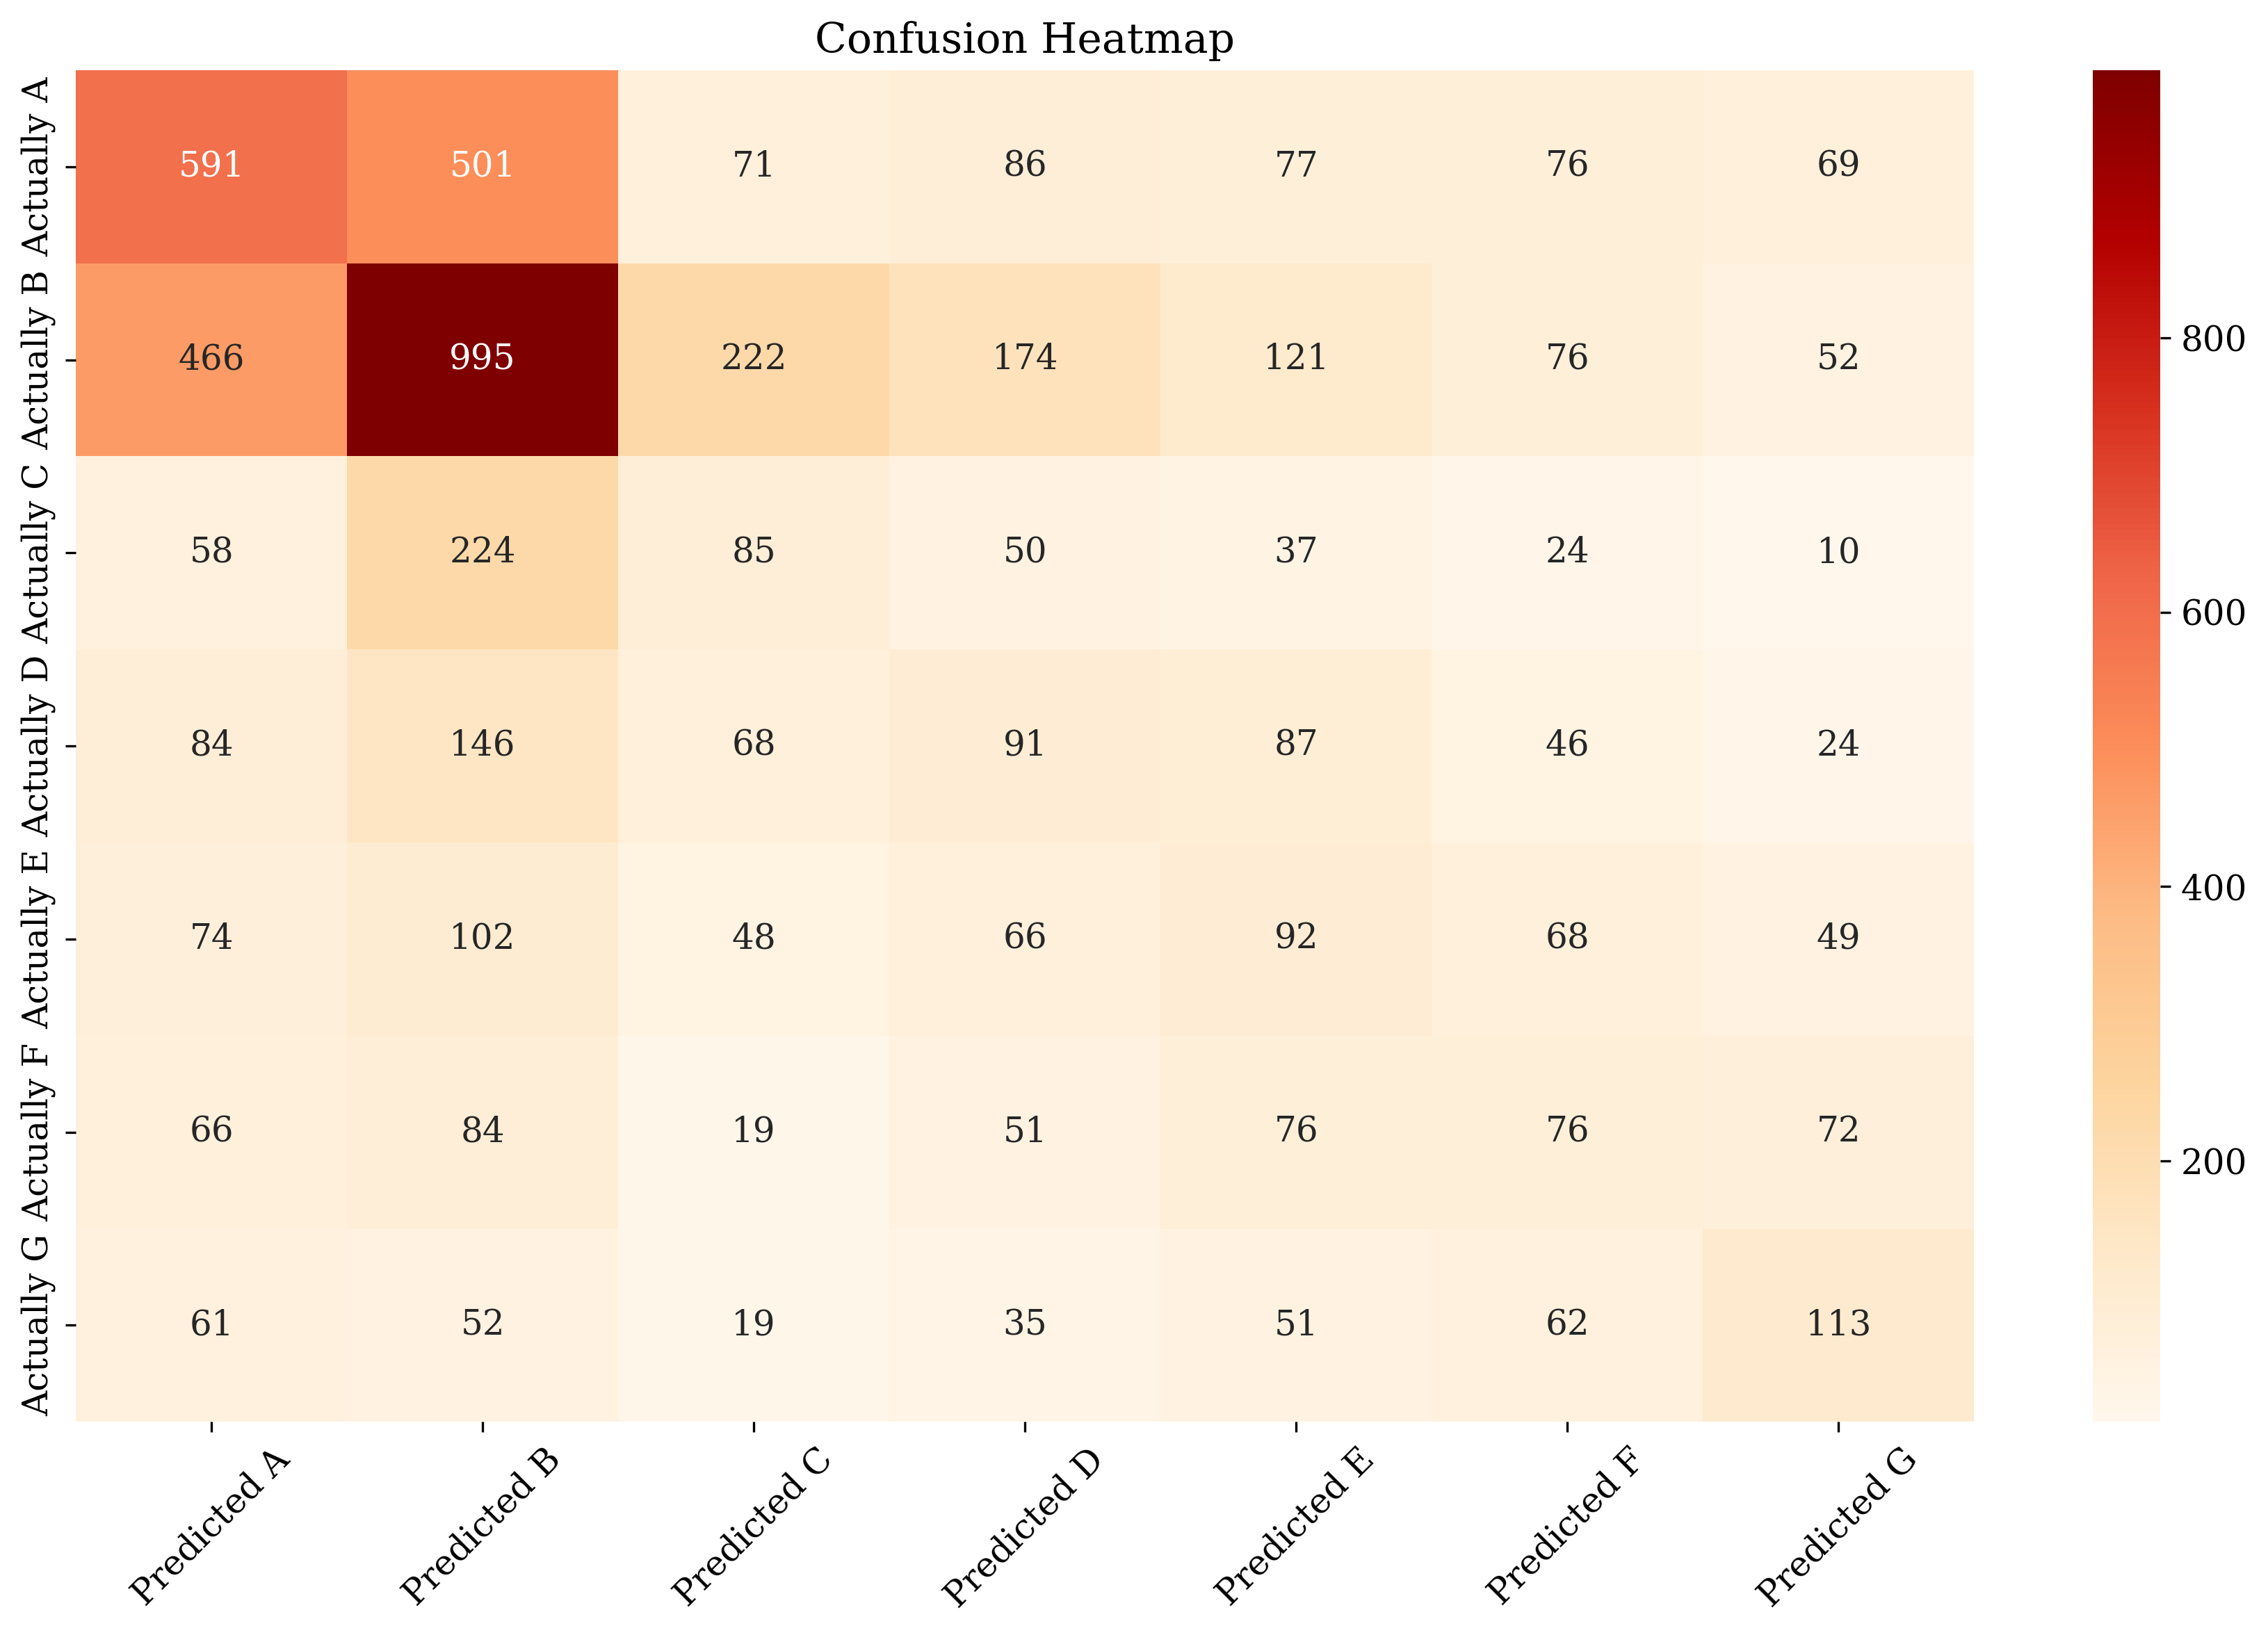

              precision    recall  f1-score   support

           A       0.42      0.40      0.41      1471
           B       0.47      0.47      0.47      2106
           C       0.16      0.17      0.17       488
           D       0.16      0.17      0.17       546
           E       0.17      0.18      0.18       499
           F       0.18      0.17      0.17       444
           G       0.29      0.29      0.29       393

    accuracy                           0.34      5947
   macro avg       0.27      0.27      0.27      5947
weighted avg       0.35      0.34      0.35      5947



In [27]:
model_utils.PlotConfusionMatrix(base_DT_model, X_test, y_test)

In [28]:
utils.count_percentage_df(y_train).sort_index()

,Count,Percentage of Total
A,5884,0.247362
B,8423,0.354101
C,1953,0.082104
D,2182,0.091731
E,1995,0.083869
F,1778,0.074747
G,1572,0.066087


Given the uneven distribution of `FIRE_SIZE_CLASS`, we see that the model is actually worse than a dummy model that always predicts class B. There are obviously improvements to be made, such as hyperparameter optimisation, but before this we will increase the number of samples using SMOTE, a method that we have used previously. As we have mentioned, the purpose of SMOTE is to increase the underrepresented classes within the data such that a model may improve the predictions it makes for these.

<a id='smote'></a>
### Upsampling with SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_sm, y_train_sm = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [30]:
utils.count_percentage_df(y_train_sm)

,Count,Percentage of Total
B,8423,0.142857
A,8423,0.142857
D,8423,0.142857
E,8423,0.142857
G,8423,0.142857
C,8423,0.142857
F,8423,0.142857


In [31]:
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train_sm, y_train_sm)

DT_model.score(X_test, y_test)

0.3211703379855389

Unfortunately the model accuracy has now decreased even more than previously. Hopefully, however, hyperparameter optimisation will improve the accuracy of the model.

---
<a id='optimisation'></a>
## Model Optimisation

<a id='param_opt'></a>
### Hyperparameter Optimisation

From the results above we realise that while the train scores were very high, the test scores were very low. This is indicative of the decision tree overfitting to the data - a problem which Decision Trees tend to be prone to if not given the correct hyperparameters. We will therefore try to improve on the hyperparameters starting with depth.

In [32]:
X_rem, X_test, y_rem, y_test = \
train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train, X_validation, y_train, y_validation = \
train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=1)

In [33]:
depths = list(range(1, 51, 1))
train_accuracies = []
validation_accuracies = []

for depth in depths:
    print(f'Fitting model: {depth}', end='\r')
    # Create model
    DT_model = DecisionTreeClassifier(max_depth=depth)
    DT_model.fit(X_train, y_train)
    
    # Append scores
    train_accuracies.append(DT_model.score(X_train, y_train))
    validation_accuracies.append(DT_model.score(X_validation, y_validation))

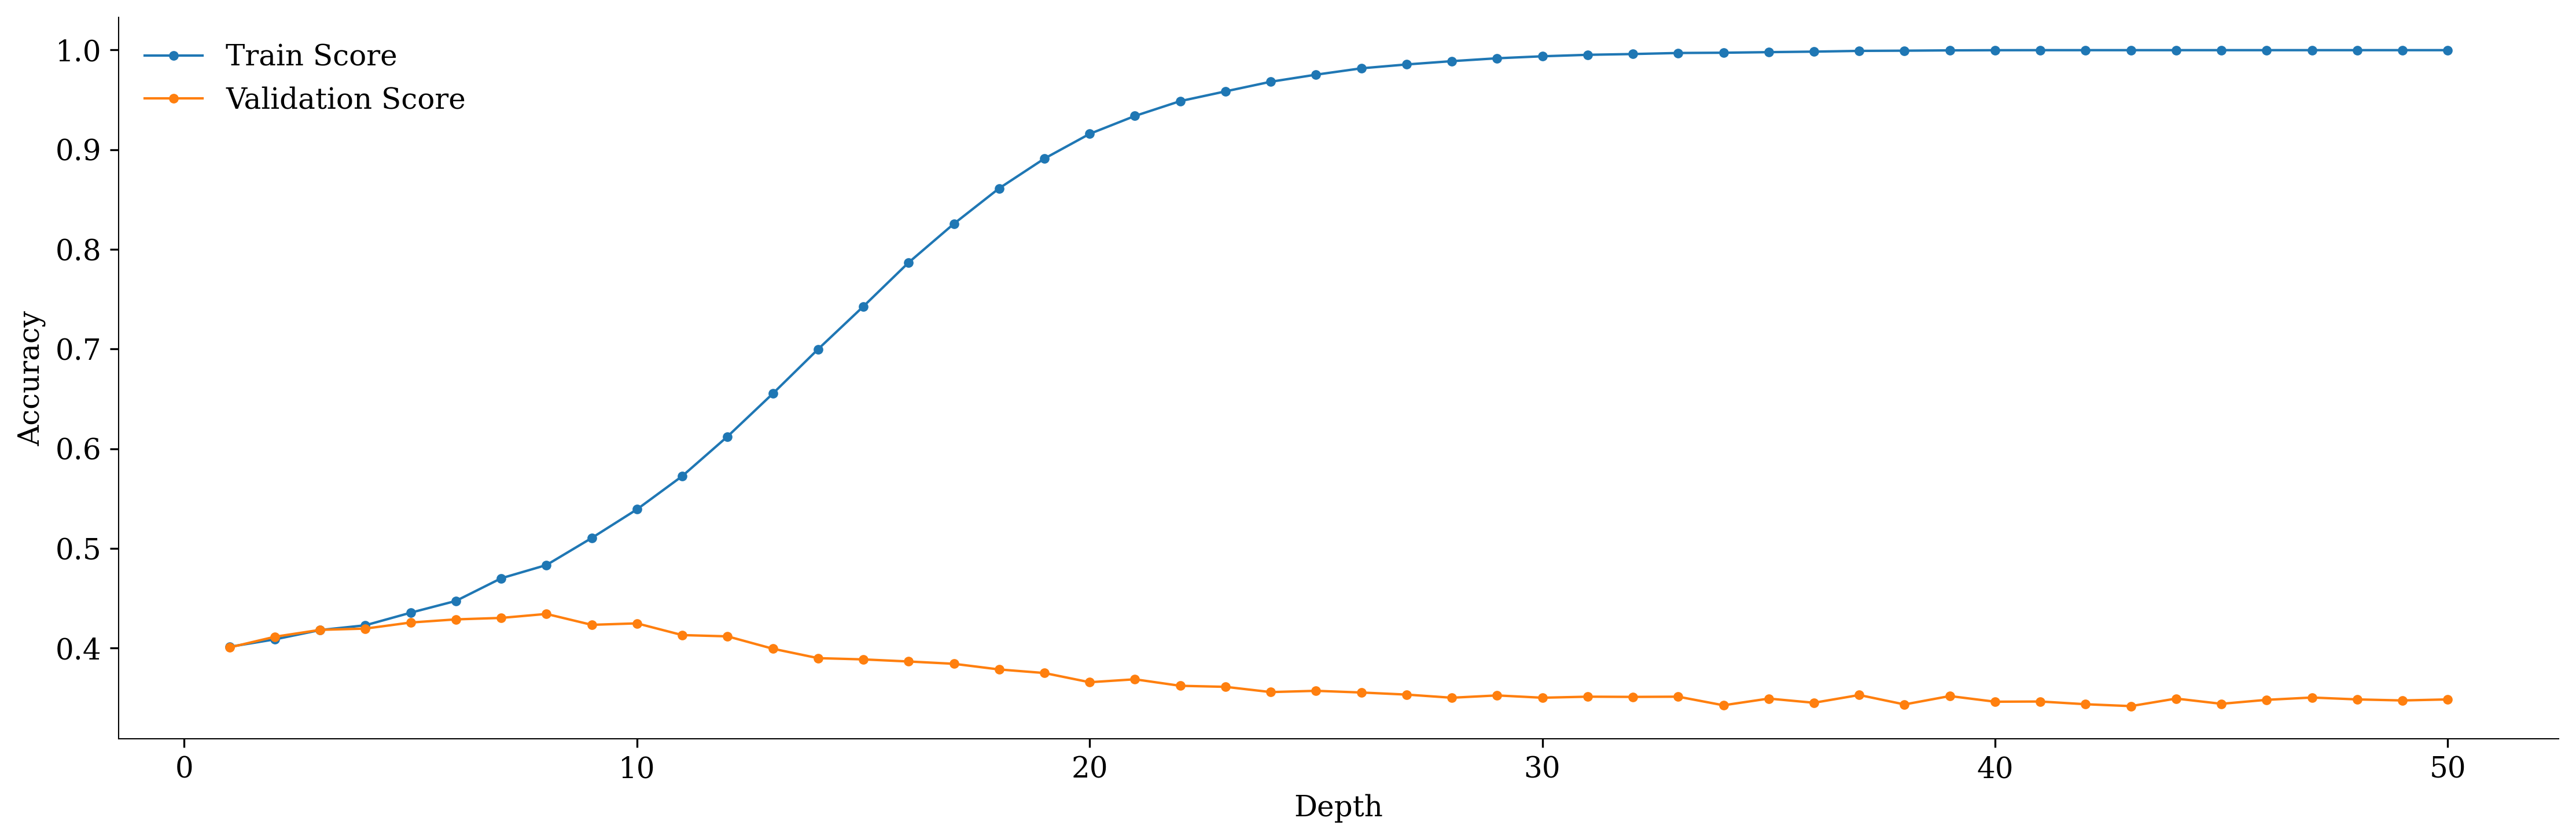

In [34]:
model_utils.PlotTrainTest(depths, 'Depth', train_accuracies, validation_accuracies, validation=True)

In [35]:
best_d = depths[np.argmax(validation_accuracies)]
print(f'The depth with the highest validation accuracy is: {best_d}')

The depth with the highest validation accuracy is: 8


In [36]:
DT_model = DecisionTreeClassifier(max_depth=8)
DT_model.fit(X_train, y_train)

DT_model.score(X_test, y_test)

0.42340675971077857

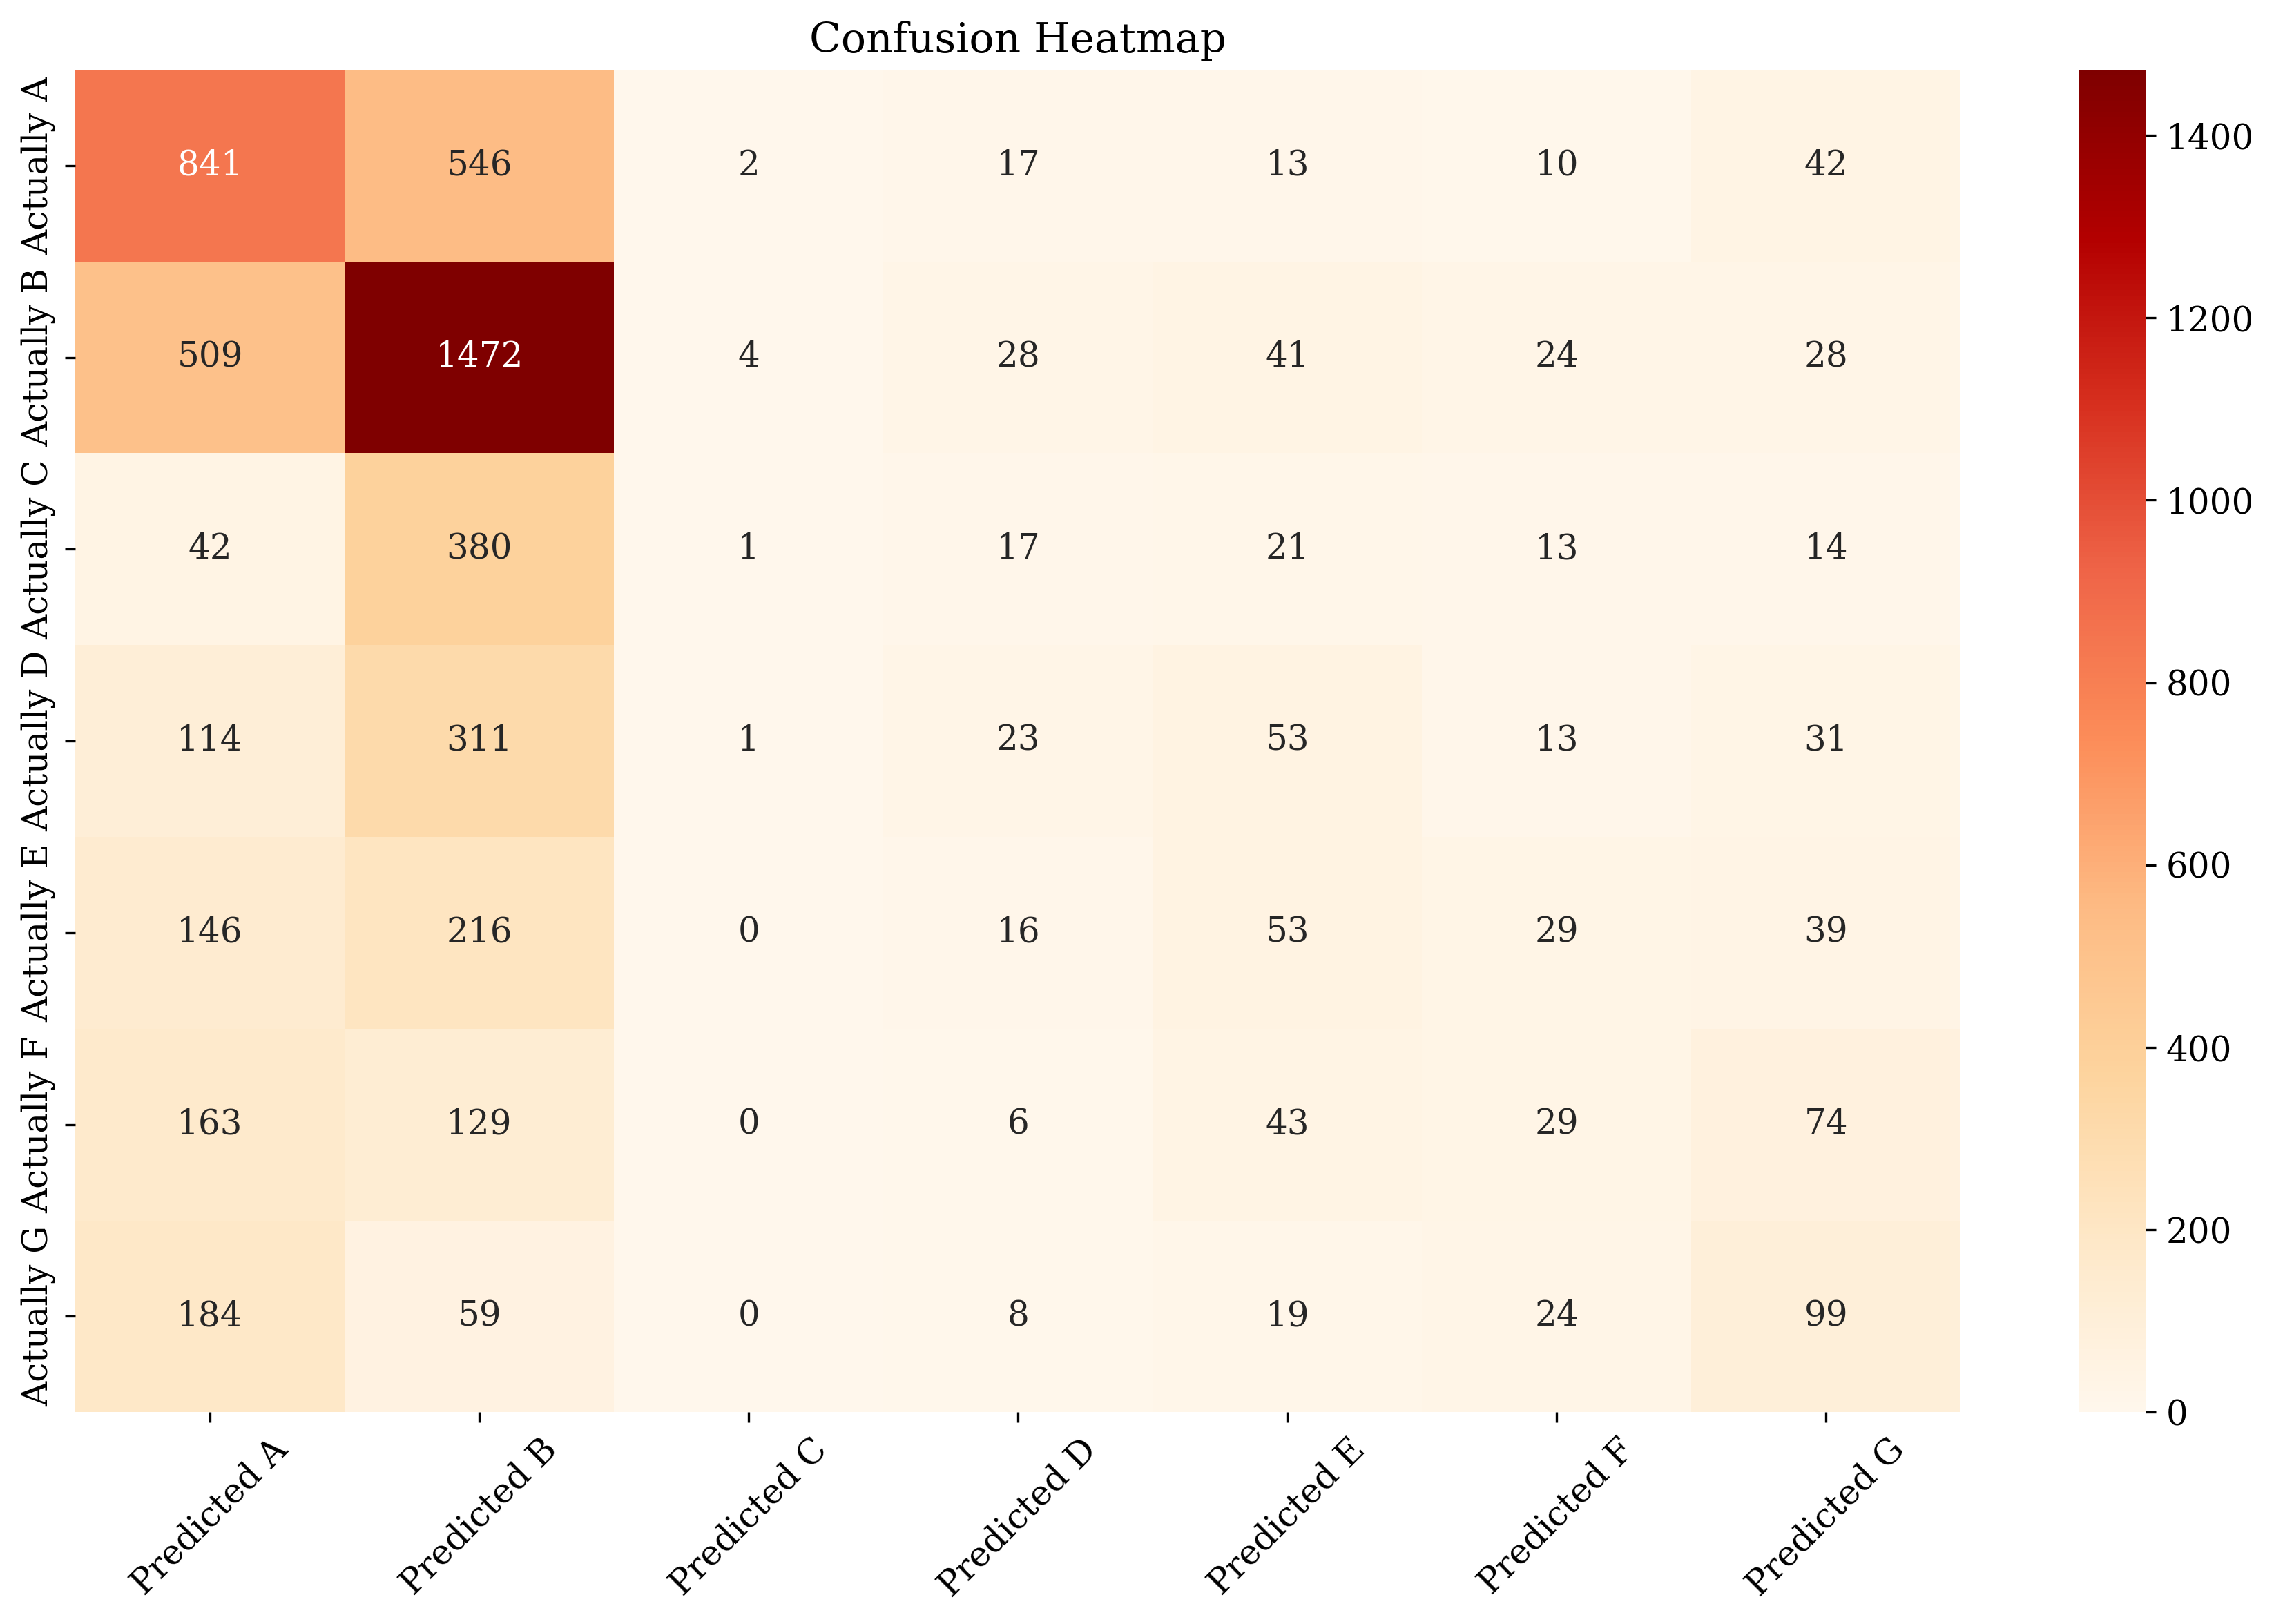

              precision    recall  f1-score   support

           A       0.42      0.57      0.48      1471
           B       0.47      0.70      0.56      2106
           C       0.12      0.00      0.00       488
           D       0.20      0.04      0.07       546
           E       0.22      0.11      0.14       499
           F       0.20      0.07      0.10       444
           G       0.30      0.25      0.27       393

    accuracy                           0.42      5947
   macro avg       0.28      0.25      0.23      5947
weighted avg       0.35      0.42      0.36      5947



In [37]:
model_utils.PlotConfusionMatrix(DT_model, X_test, y_test)

As we can see, the optimum depth - according to the validation scores - is a depth of 8. We see that after that point the model overfits and underperforms when classifying. We can further validate the optimum depth by using cross-validation, as this will reduce the data leakage that occurs when performing this hyperparameter optimisation. 

In [38]:
from sklearn.model_selection import cross_val_score

# Generate depths
depths = list(range(1, 51))

# Initialise list
cross_validation_scores = []

# Iteratively create models
for depth in depths:
    print(f'Fitting model: {depth}', end='\r')
    DT_model = DecisionTreeClassifier(max_depth=depth)
    cv_score = np.mean(cross_val_score(DT_model, X_rem, y_rem, cv = 2))
    cross_validation_scores.append(cv_score)

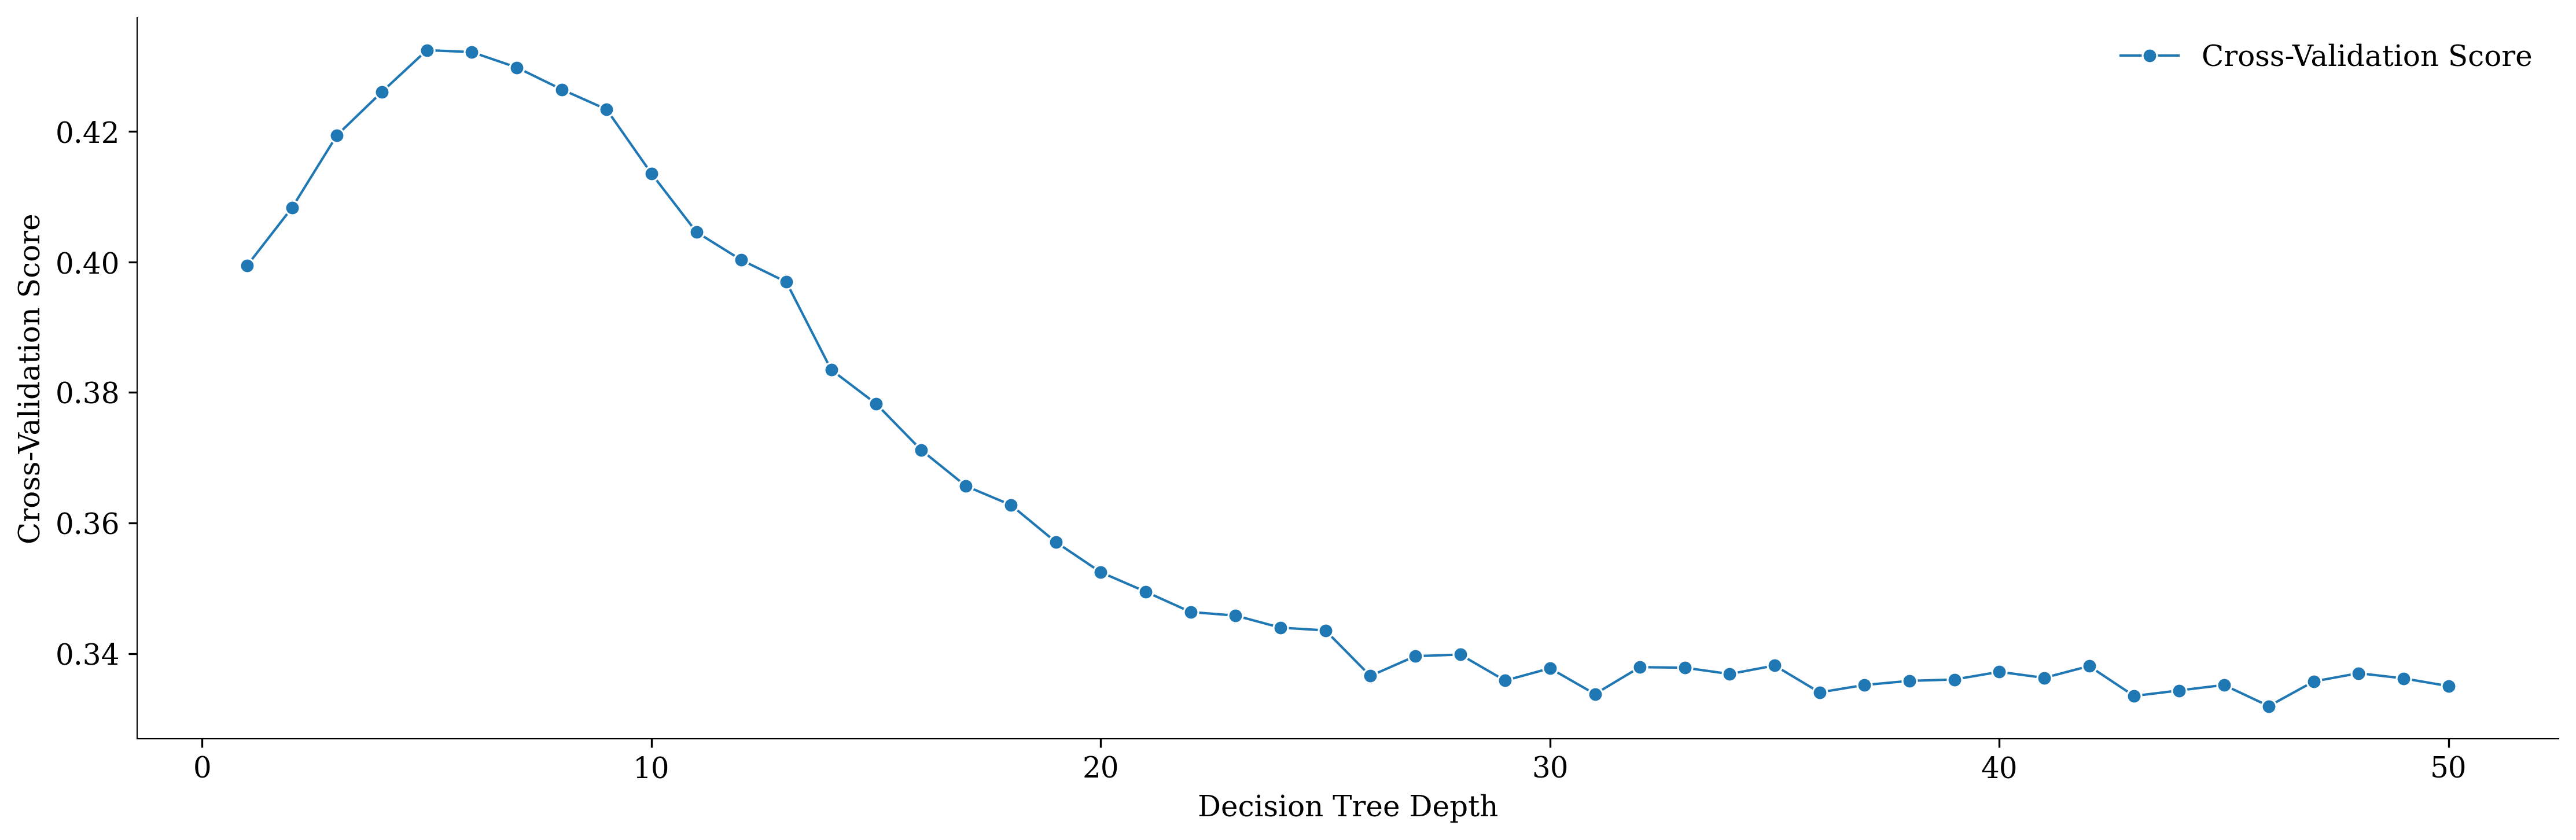

In [39]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=depths, y=cross_validation_scores, marker='o', label='Cross-Validation Score')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Cross-Validation Score')
plt.legend()
plt.show()

In [40]:
optimum_depth = depths[np.argmax(cross_validation_scores)]
print(f'The optimum depth for the decision tree model is {optimum_depth}')

The optimum depth for the decision tree model is 5


Having completed the cross validation we see that the optimum depth calculated was 5. Using this we can create a further model and calculate the accuracy of the model.

In [41]:
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(X_rem, y_rem)

print(f'The test accuracy of the model with a max depth of 5 is: {DT_model.score(X_test, y_test):.2f}')

The test accuracy of the model with a max depth of 6 is: 0.42


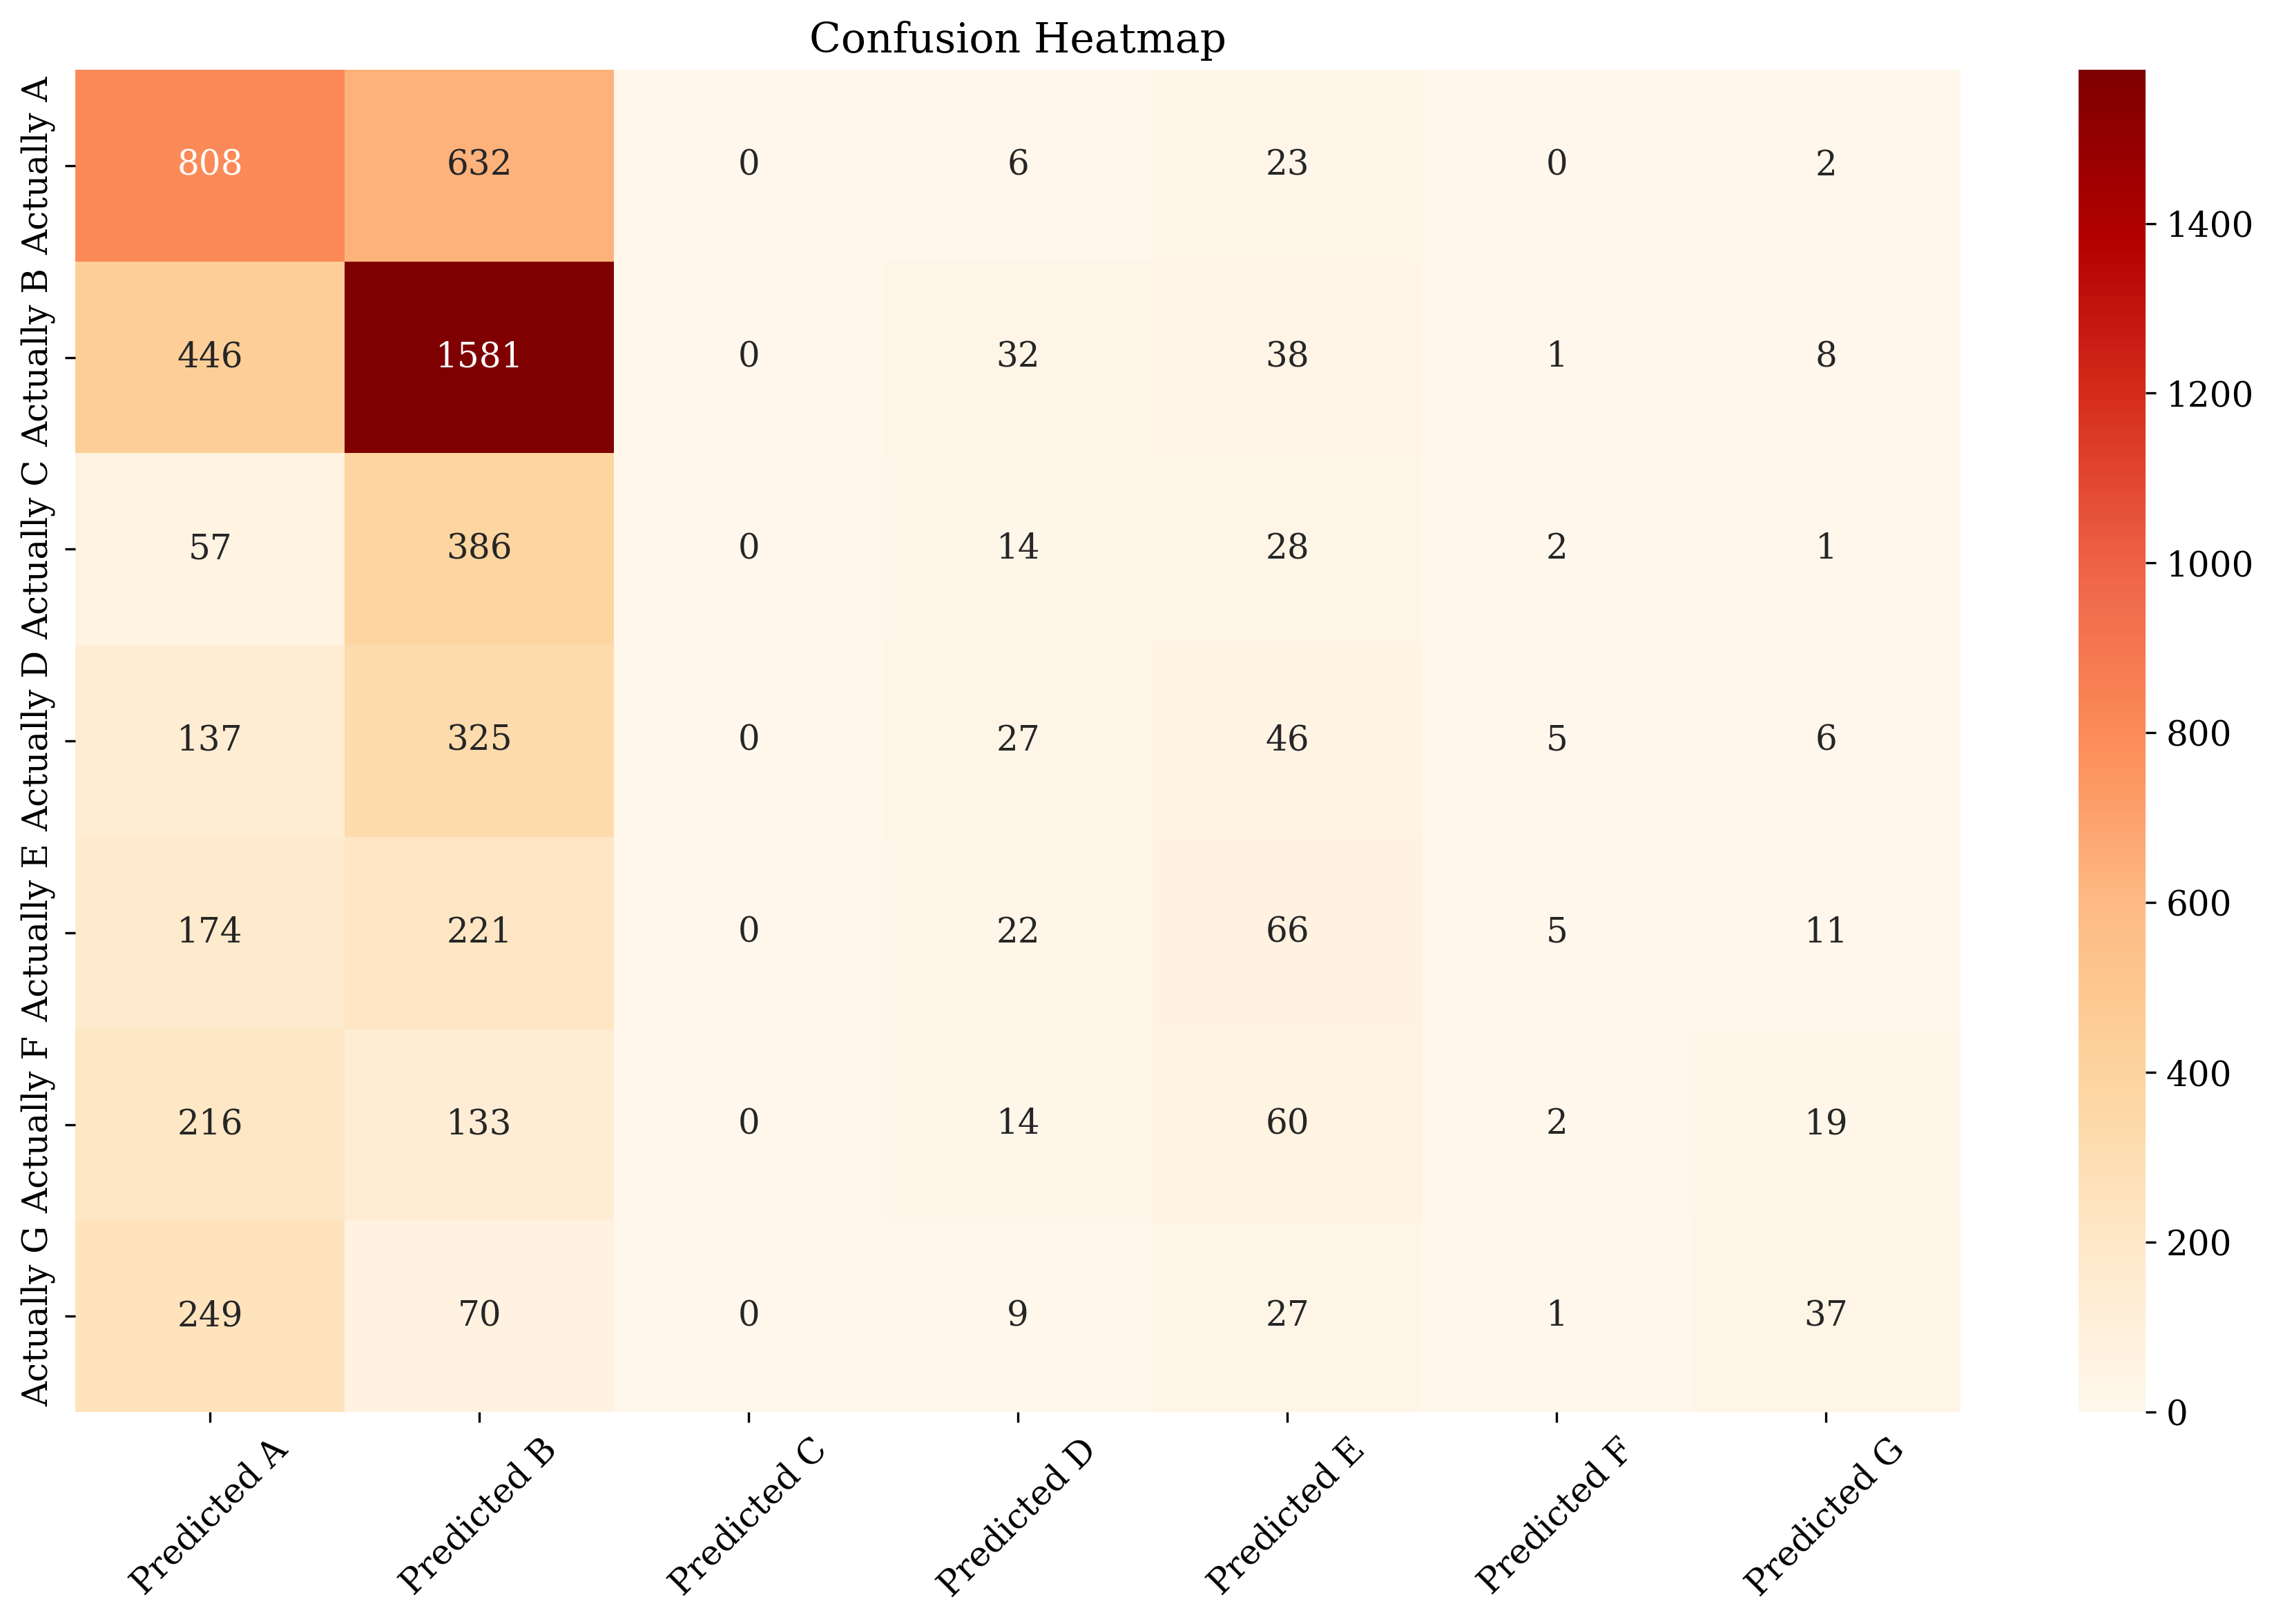

              precision    recall  f1-score   support

           A       0.39      0.55      0.45      1471
           B       0.47      0.75      0.58      2106
           C       0.00      0.00      0.00       488
           D       0.22      0.05      0.08       546
           E       0.23      0.13      0.17       499
           F       0.12      0.00      0.01       444
           G       0.44      0.09      0.16       393

    accuracy                           0.42      5947
   macro avg       0.27      0.23      0.21      5947
weighted avg       0.34      0.42      0.35      5947



In [46]:
model_utils.PlotConfusionMatrix(DT_model, X_test, y_test)

<a id='gridsearch'></a>
### Hyperparameter Optimisation with Grid Search

In [47]:
from tempfile import mkdtemp
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

cachedir = mkdtemp()

estimators = [('reduce_dim', PCA()),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators, memory=cachedir)

param_grid = [{'reduce_dim': [PCA(), PCA(n_components=0.9), None], 
               'model__max_depth': [3, 4, 5, 6, 7, 8, 9],
               'model__criterion': ['gini', 'entropy'],
               'model__splitter': ['best', 'random'],
               'model__min_samples_leaf': list(range(2, 20, 2))}]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid = grid.fit(X_rem, y_rem)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   0.8s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.3s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__splitt

[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, 

[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=g

[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion

[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   0.6s
[CV] END model__criterion

[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini

[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   0.7s
[CV] END model__criterion=gin

[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total

[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf

[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=4, model__min_samples_lea

[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__splitter=random, reduce_di

[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] EN

[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion

[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gi

[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=None; total time=   0.3s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=None; total time=   0.3s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=None; total time=   0.3s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__splitter=best, reduce_dim=None; total tim

[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__splitt

[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(n_components=0.9)

[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END m

[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END m

[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__c

[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__c

[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END m

[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END m

[CV] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__

[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__c

[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END mo

[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END m

[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END m

[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.4s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.4s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.4s
[CV] END model__criterion=gini,

[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END mo

[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=10, model__split

[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__spl

[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(n_c

[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END

[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model

[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best, reduce_dim=None; total time=   0.2s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__splitter=best

[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.0s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=16, m

[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); 

[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END mo

[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] E

[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV]

[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   1.3s
[CV]

[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.6s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.6s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   1.6s
[CV] END 

[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__splitter=random, reduce_d

[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=5, mo

[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model

[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=best, reduce_dim=None; total time=   0.3s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=best, reduce_dim=None; total time=   0.3s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__splitter=random, reduce_dim=PCA(); total time=   0.1

[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model

[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduce_dim=None; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__splitter=best, reduc

[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, m

[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components

[CV] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=18, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   

[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0

[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(n_components=0.9); total tim

[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   2.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__splitter=best, reduce_dim=PCA(n_components=0.9); total ti

[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=16, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   2.0s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(); total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=18, model__splitter=best, reduce_dim=PCA(n_components=0.9); total ti

[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0

[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=8, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   0

[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(); total time=   2.4s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__splitter=best, reduce_dim=PCA(n_components=0.9); total ti

[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=14, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(); total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__splitter=best, reduce_dim=PCA(n_components=0.9); total ti

[CV] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__splitter=best, reduce_dim=PCA(n_components=0.9); total time=   

[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=6, model__splitter=best, reduce_dim=PCA(); total time=   2.6s
[CV] END mo

[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=10, model__splitter=best, reduce_dim=PCA(); total ti

[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__splitter=random, reduce_dim=None; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_

[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__splitter=random, reduce_dim=PCA(n_components=0.9); total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=9, model__min_sample

In [48]:
fittedgrid.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 6,
 'model__min_samples_leaf': 10,
 'model__splitter': 'best',
 'reduce_dim': None}

In [49]:
fittedgrid.best_estimator_.score(X_test, y_test)

0.42727425592735835

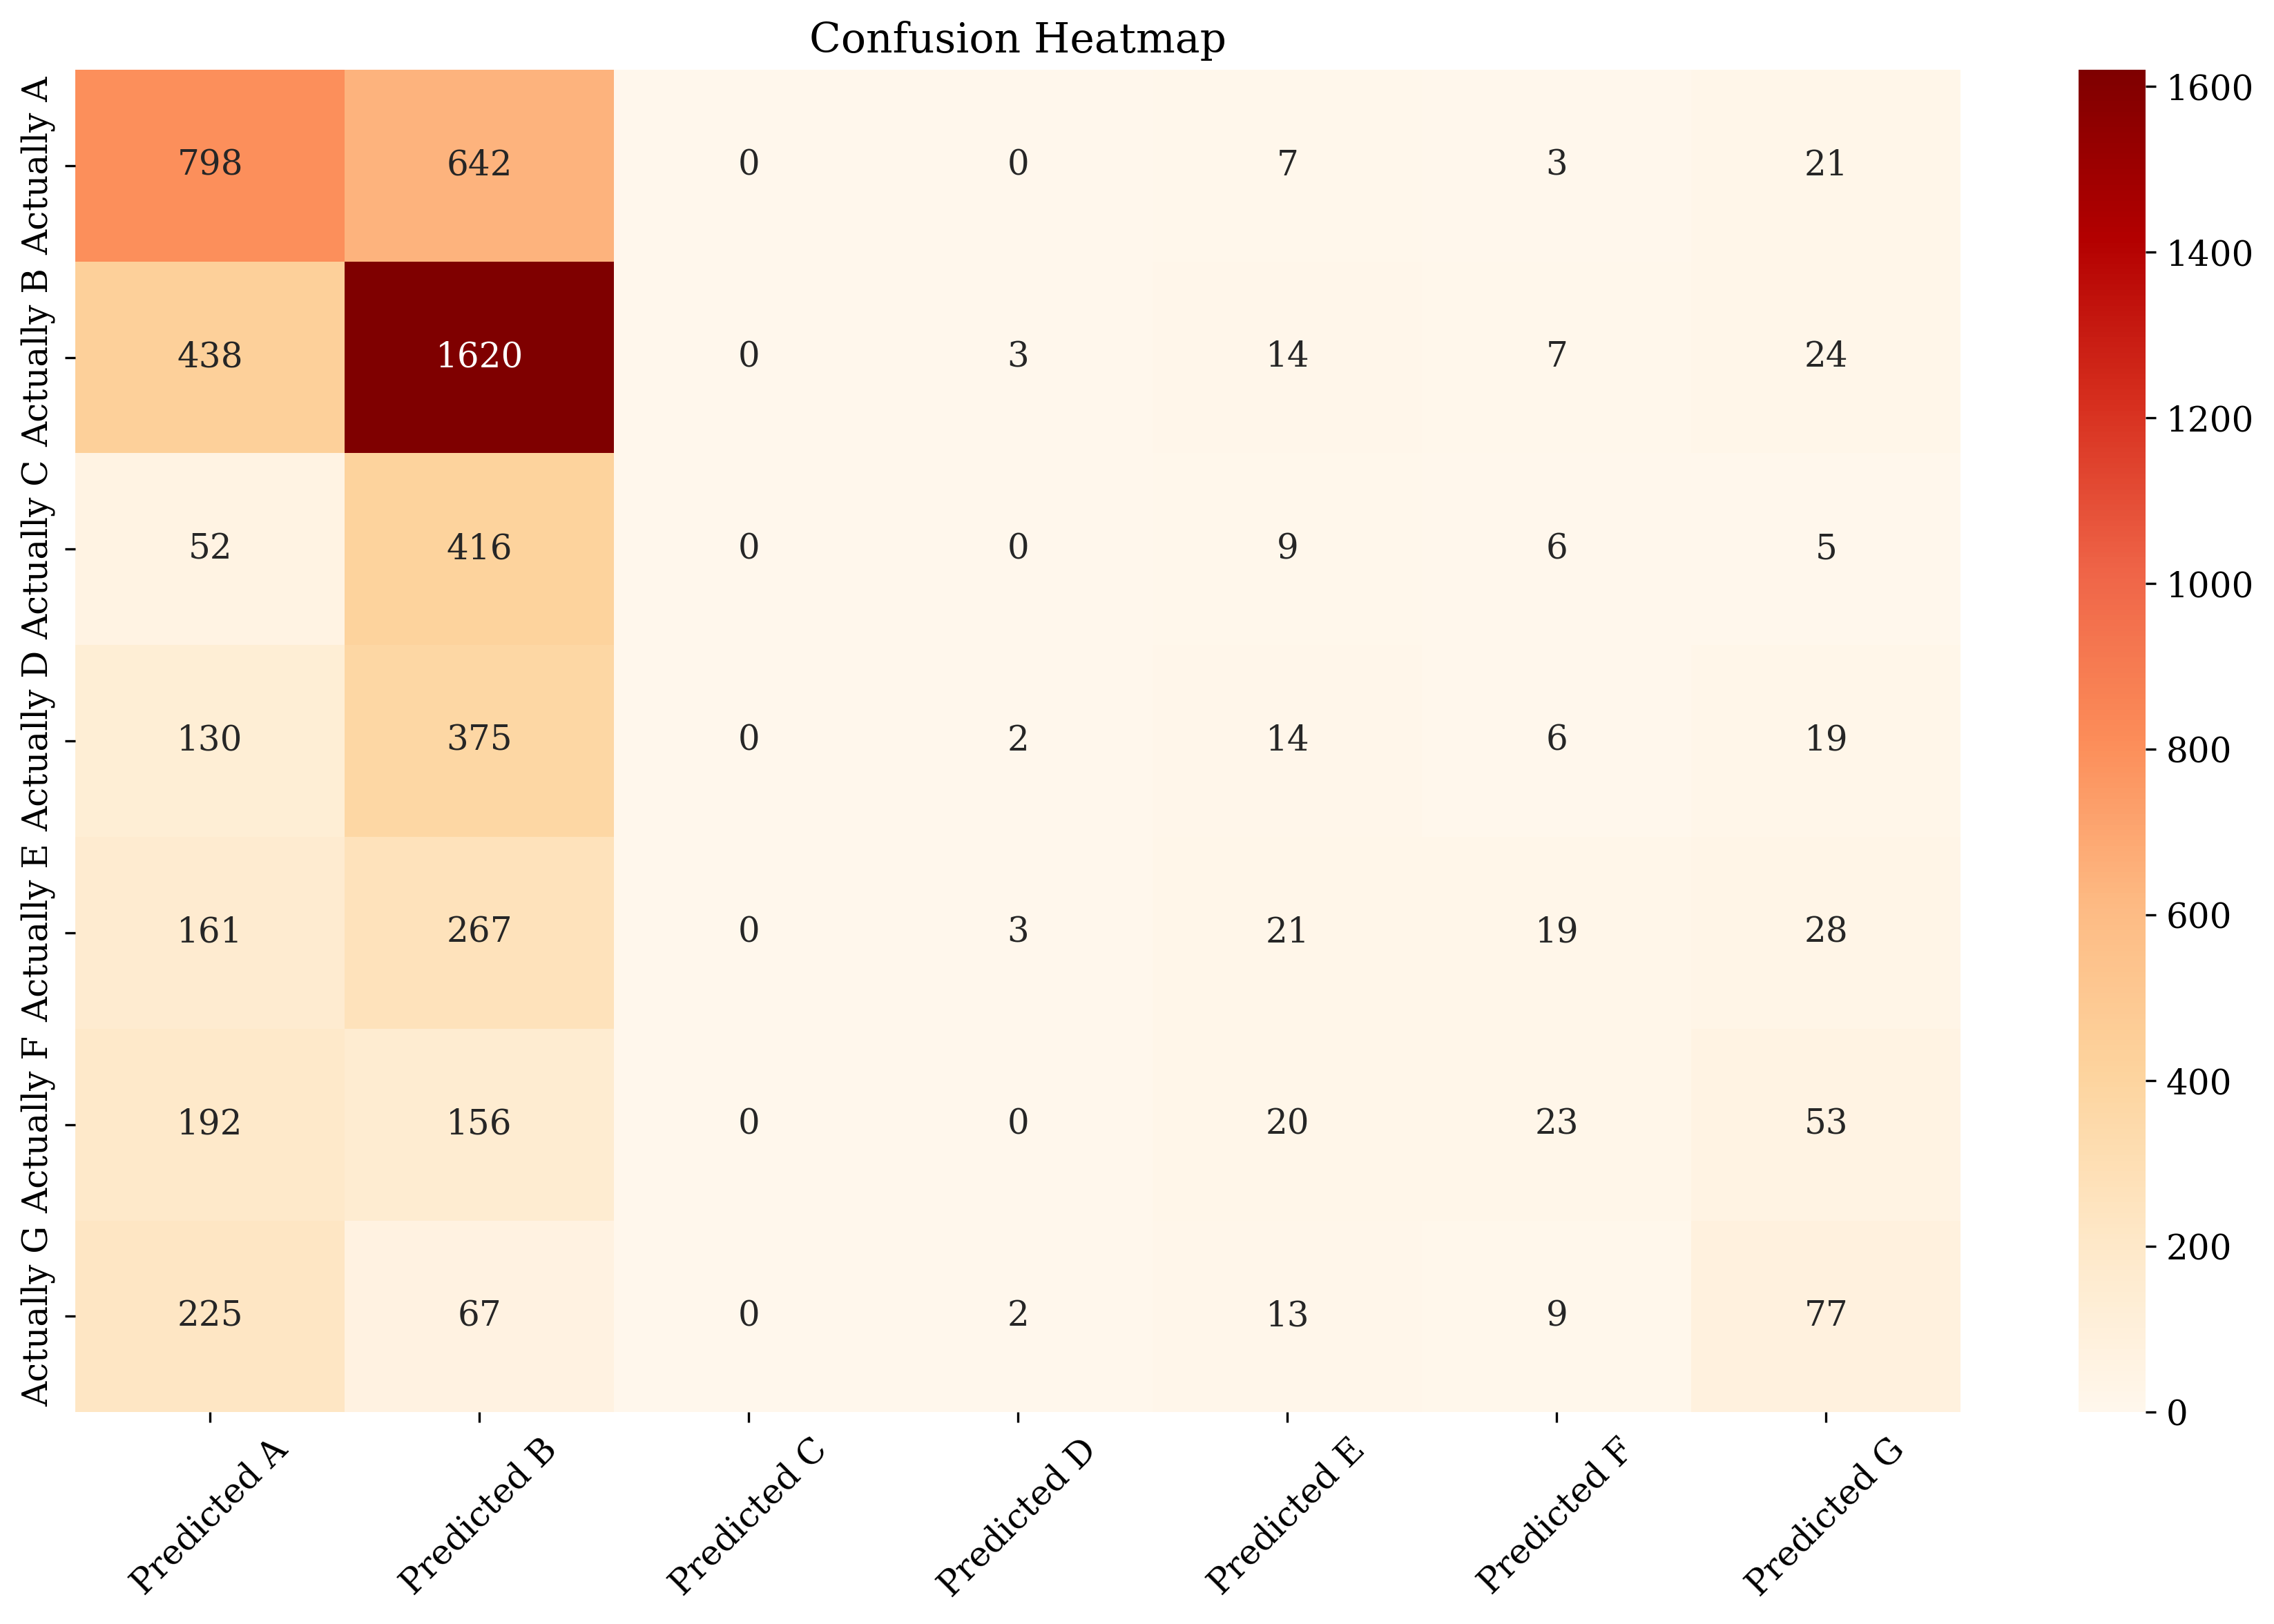

              precision    recall  f1-score   support

           A       0.40      0.54      0.46      1471
           B       0.46      0.77      0.57      2106
           C       0.00      0.00      0.00       488
           D       0.20      0.00      0.01       546
           E       0.21      0.04      0.07       499
           F       0.32      0.05      0.09       444
           G       0.34      0.20      0.25       393

    accuracy                           0.43      5947
   macro avg       0.28      0.23      0.21      5947
weighted avg       0.34      0.43      0.35      5947



In [50]:
model_utils.PlotConfusionMatrix(fittedgrid.best_estimator_, X_test, y_test)

---
<a id='save'></a>
#### Saving the model

In [52]:
# import pickle

# pickle.dump(fittedgrid, open('models/dt_model.sav', 'wb'))

<a id='load'></a>
#### Loading the model

In [ ]:
# fittedgrid = pickle.load(open('models/dt_model.sav', 'rb'))

---
<a id='conc'></a>
## Remarks on Decision Trees